지도학습(분류)

- 결정 트리 모델
> 왜 이렇게 분류했는지 정확!(모델 설명 가능)

=> 머신러닝, 딥러닝 문제점=>XAI 데이터를 넣어서 학습을 시킨 후 성능이 잘나옴 근데 왜 성능이 잘 나오는지 모름

와인 데이터
- 레드와인, 화이트 와인 분류
- 당도, 알콜, pH, 클래스(정답)

### 1. 데이터 로드

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
wine.head()  #클래스는 0과 1로 구성됨

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


### 2. 탐색 전 데이터 분석

In [5]:
# 와인 6497개 샘플
# 4가지(알콜, 당도, pH, 클래스): 실수값
# 누락된 값 없음(결측치 존재 X, non-null)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [8]:
# 정규화 필요 => 알콜, 당도, pH 특징의 크기가 모두 제각각
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


### 3. 데이터 전처리

In [9]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

print(type(data))
print(type(target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
from sklearn.model_selection import train_test_split

# 8:2의 비율
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state =42)

In [12]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 4. 결정 트리 모델
- 분류결과 설명 가능한 모델

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


#### overfitting , 과대적합되었음 
- 가장 좋은 모델: train이 test보다 쪼오금 더 좋게 나와야함 
    - train: 0.99 이므로 test: 0.97 정도

<function matplotlib.pyplot.show(*args, **kw)>

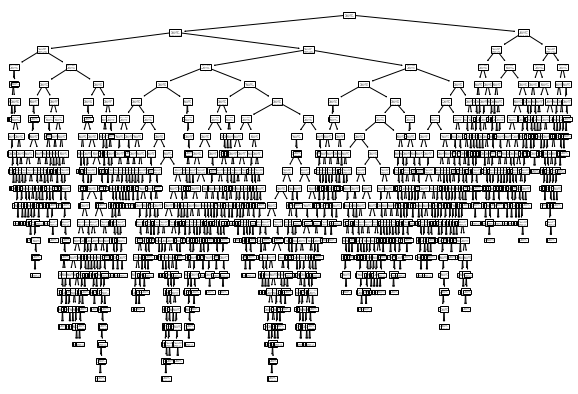

In [17]:
# 트리 모델 시각화 
# - 트리모델은 나무 거꾸로 한 형상 

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show

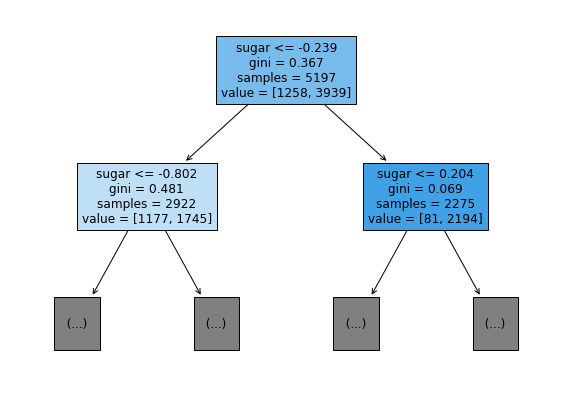

In [18]:
plt.figure(figsize =(10,7))

plot_tree(dt, max_depth = 1, filled = True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### 설명
- root의 value 값을 더하면 5197개일 것(전체)
- 당도가 -0.239보다 작으면 왼쪽, 크면 오른쪽
- 왼쪽의 subtree에서 sugar값이 -0.802보다 더 작으면 왼쪽 크면 오른쪽
- gini라는 것은 불순도(중요)
- 가지친 것을 계속 따라가면 레드와인 구분할 수 있음

#### 불순도(gini 계수) *시험*
$지니 불순도 = 1-(음성클래스비율^2 + 양성클래스비율^2)$

- 지니계수의 값은 0~0.05
- 0.5면 최악(클래스가 모두 동일)
- 0이면 순수노드(하나의 클래스로 분류됨)
- 가지를 쳤을 때 불순도값이 줄어드는 방향으로 학습